In [60]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir("C:/Users/C10381149/OneDrive - Technological University Dublin/Documents/Python/Datasets/")
trolley=pd.read_csv("TrolleyGAR.csv")
trolley.head()

,Hospital.Code,Target.Date,Total.2pm,Total.8pm,Total.8am
0,101,01/01/2013,1.0,0.0,2
1,102,01/01/2013,12.0,8.0,11
2,108,01/01/2013,4.0,10.0,9
3,201,01/01/2013,3.0,4.0,9
4,202,01/01/2013,0.0,0.0,5


In [61]:
trolley.columns=['provider','date','total8am','total8pm','total2pm']

In [62]:
trolley=trolley.drop(columns=['total2pm','total8pm'])

In [63]:
trolley['date']=pd.to_datetime(trolley.date, format="%d/%m/%Y")

In [64]:
trolley['year']=trolley.date.dt.year
trolley['month']=trolley.date.dt.month

In [65]:
agg2019=trolley.query('year >= 2019 and year < 2021').groupby(by='provider').aggregate({'total8am':'sum'})
big3=list(agg2019.sort_values('total8am',ascending=False).head(3).index)

In [70]:
big3DF=trolley[(trolley.provider.isin(big3)) & (trolley.year >= 2019) & 
(trolley.year < 2021)].reset_index(drop=True)

In [71]:
big3DF['30dma']=0.0
for i in range(len(big3DF)):
    provider_i = big3DF.loc[i, 'provider']
    date_i = big3DF.loc[i, 'date']
    last_30_days = pd.date_range(end=date_i, periods=30)
    moving_average_i = trolley[(trolley.date.isin(last_30_days)) & 
    (trolley.provider==provider_i)].total8am.mean()
    big3DF.loc[i, '30dma'] = moving_average_i

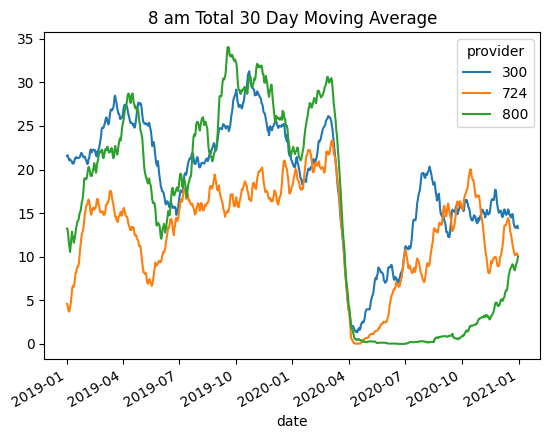

In [72]:
big3DF.pivot(index='date', columns='provider', values='30dma').plot(
    title="8 am Total 30 Day Moving Average")
plt.show()